In [1]:
from google.colab import files
uploaded = files.upload()

Saving ML_Materials.zip to ML_Materials.zip


In [2]:
import zipfile

# ZIP dosyasını açma
zip_path = '/content/ML_Materials.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()  # İçerikleri listeleme

File Name                                             Modified             Size
Kurs Materyalleri(Makine O╠êg╠årenmesi)/       2024-03-23 21:01:18            0
__MACOSX/._Kurs Materyalleri(Makine O╠êg╠årenmesi) 2024-03-23 21:01:18          212
Kurs Materyalleri(Makine O╠êg╠årenmesi)/cart.py 2021-07-19 21:32:38        12884
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._cart.py 2021-07-19 21:32:38          212
Kurs Materyalleri(Makine O╠êg╠årenmesi)/.DS_Store 2021-12-18 18:48:58         6148
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._.DS_Store 2021-12-18 18:48:58          212
Kurs Materyalleri(Makine O╠êg╠årenmesi)/diabetes_pipeline.py 2021-07-22 17:55:44         9324
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._diabetes_pipeline.py 2021-07-22 17:55:44          268
Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/ 2024-03-23 21:01:18            0
__MACOSX/Kurs Materyalleri(Makine O╠êg╠årenmesi)/._datasets 2024-03-23 21:01:18          212
Kurs Materyalleri(Makine O╠êg╠å

In [3]:
import zipfile
import os

zip_path = '/content/ML_Materials.zip'
extract_path = '/content/ML_Materials/'

# ZIP dosyasını aç ve içeriği çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extract('Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/diabetes.csv', extract_path)

# Çıkarılan dosyanın yolunu görüntüle
extracted_file = os.path.join(extract_path, 'Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/diabetes.csv')
extracted_file


'/content/ML_Materials/Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/diabetes.csv'

CART ( Classification & Regression Tree )

In [ ]:
- amaç karmaşık veri setlerini basit karar yapılarına dönüştürmek
- heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır

CART Kütüphane Kurulumları

In [8]:
!pip install pydotplus

In [9]:
!pip install skompiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54310 sha256=f9a47763b0b18c2554ed5036714925a5f85e0c02922d7f839db5ad3926148b16
  Stored in directory: /root/.cache/pip/wheels/14/72/77/016a3480b154c1c2f70dcb355af1a01ef832974079ec6148e6
Successfully built skompiler


In [10]:
!pip install astor

In [11]:
!pip install joblib

In [12]:
import warnings
import joblib
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from skompiler import skompile
import graphviz

In [13]:
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=Warning)

modelleme

In [14]:
import pandas as pd
df = pd.read_csv("/content/ML_Materials/Kurs Materyalleri(Makine O╠êg╠årenmesi)/datasets/diabetes.csv")

In [15]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [16]:
cart_model = DecisionTreeClassifier(random_state=1).fit(X, y)

In [17]:
# Confusion matrix için y_pred:
y_pred = cart_model.predict(X)

In [19]:
# AUC için y_prob:
y_prob = cart_model.predict_proba(X)[:, 1]

In [20]:
# Confusion matrix
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [21]:
# AUC
roc_auc_score(y, y_prob)

1.0

bu kadar iyi çıkmasına sevinmeli miyim? modeli iyi mi kurdum yoksa aşırı öğrenmeye mi gitti? çğrenmek için:

Holdout Yöntemi ile Başarı Değerlendirme

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [23]:
# Train Hatası
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))
roc_auc_score(y_train, y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00       191

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



1.0

In [24]:
# Test Hatası
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_prob) #model eğitildiği veride yuksek basarı gosterdi. ama bilmediği veride oranlar neredeyse yarı yarıya dustu

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       154
           1       0.53      0.56      0.54        77

    accuracy                           0.69       231
   macro avg       0.65      0.66      0.65       231
weighted avg       0.69      0.69      0.69       231



0.6558441558441559

In [ ]:
#yani capraz dogrulamaya gitmem lazım

CV ile Başarı Değerlendirme

In [26]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

cv_results = cross_validate(cart_model,X, y,cv=5,scoring=["accuracy", "f1", "roc_auc"])

In [27]:
cv_results['test_accuracy'].mean()

0.7058568882098294

In [28]:
cv_results['test_f1'].mean()

0.5710621194523633

In [29]:
cv_results['test_roc_auc'].mean()

0.6719440950384347

In [ ]:
#bunlar en gecerli sonuclar

Hiperparametre Optimizasyonu

In [30]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [31]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}#bu degerleri neye gore giriyoruz hafize biliyo musun?
               #ön tanımlı degerlere bakıp etrafındaki değerleri giriyoruz. kafamıza gore degil yani

In [32]:
cart_best_grid = GridSearchCV(cart_model, #GridSearchCV metodu en iyi parametreleri vermek icin kullanılan metod
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=1).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [33]:
cart_best_grid.best_params_ #en iyi degerler

{'max_depth': 5, 'min_samples_split': 4}

In [34]:
cart_best_grid.best_score_ #en iyi degerlere gore en iyi skorlar

0.7500806383159324

In [37]:
random = X.sample(1, random_state=45)
cart_best_grid.predict(random)

array([1])

Final Model

In [38]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(X, y)

In [39]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 17,
 'splitter': 'best'}

In [40]:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

In [41]:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [42]:
cv_results['test_accuracy'].mean()

0.7500806383159324

In [43]:
cv_results['test_f1'].mean()

0.614625004082526

In [44]:
cv_results['test_roc_auc'].mean()

0.797796645702306

In [ ]:
#basarılı bir sekilde hataları dusurduk ve oranları yukselttik. yukarıdan bakabilirsin

Özellik Önemi ( Feature Importance )

In [45]:
cart_final.feature_importances_

array([0.01129738, 0.49448119, 0.05065617, 0.        , 0.01497644,
       0.22221379, 0.06819923, 0.13817579])

In [49]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

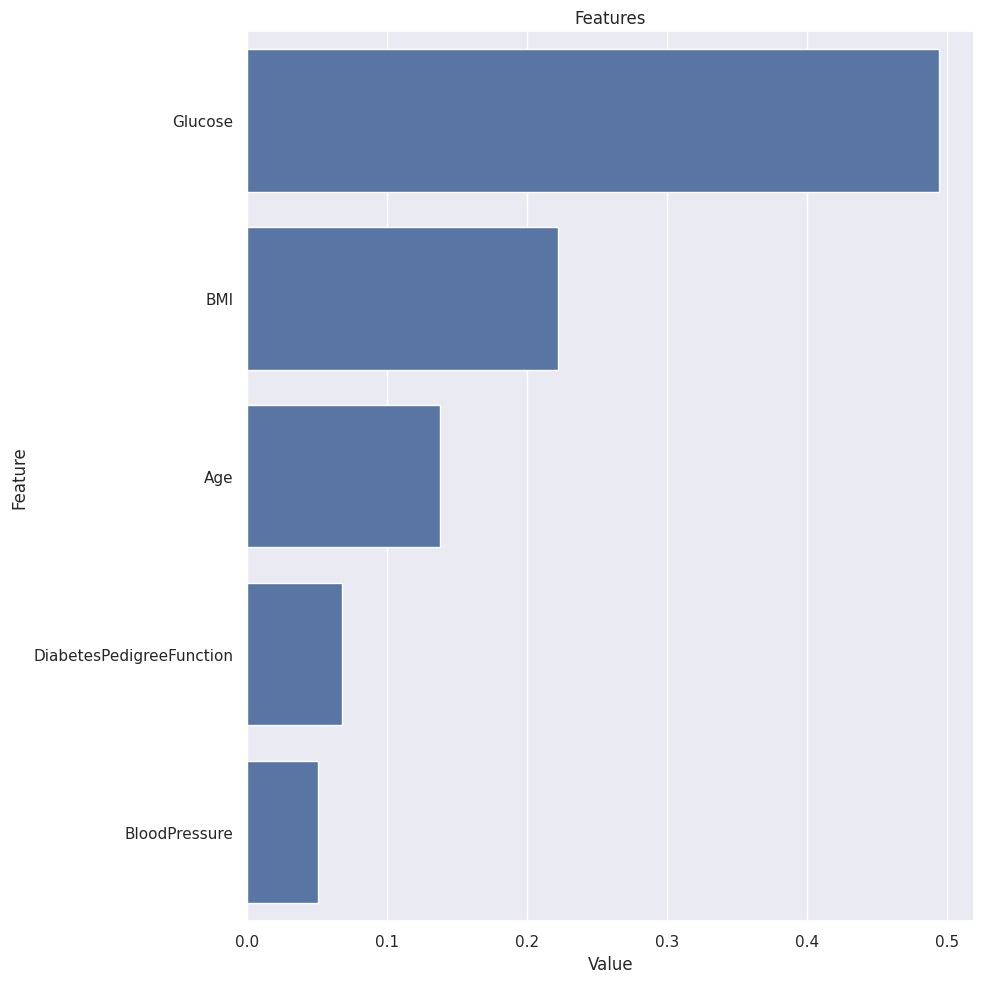

In [50]:
plot_importance(cart_final, X, num=5)

Öğrenme Eğrileriyle Model Karmaşıklığını Analiz Etme

In [51]:
train_score, test_score = validation_curve(cart_final, X, y,
                                           param_name="max_depth",
                                           param_range=range(1, 11),
                                           scoring="roc_auc",
                                           cv=10)

In [52]:
mean_train_score = np.mean(train_score, axis=1)

In [53]:
mean_test_score = np.mean(test_score, axis=1)

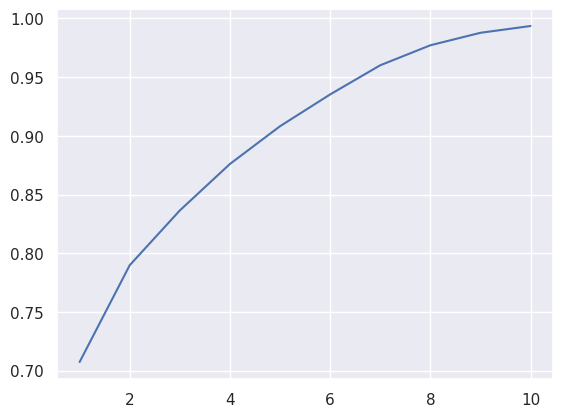

In [54]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

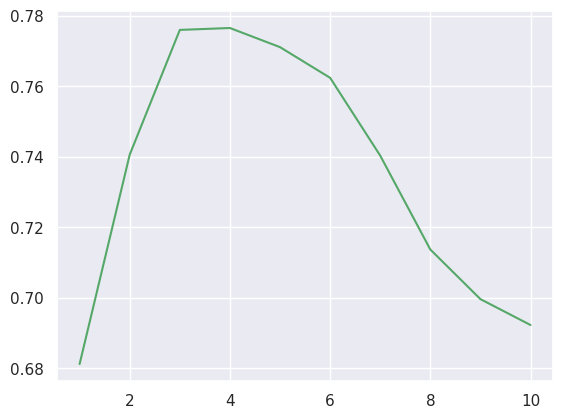

In [56]:
plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

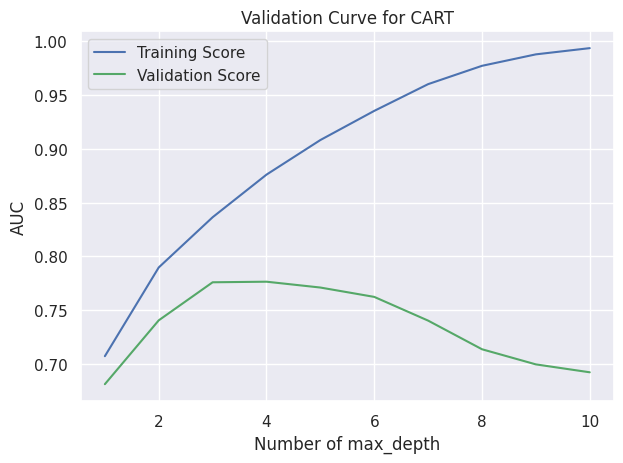

In [58]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')

plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()


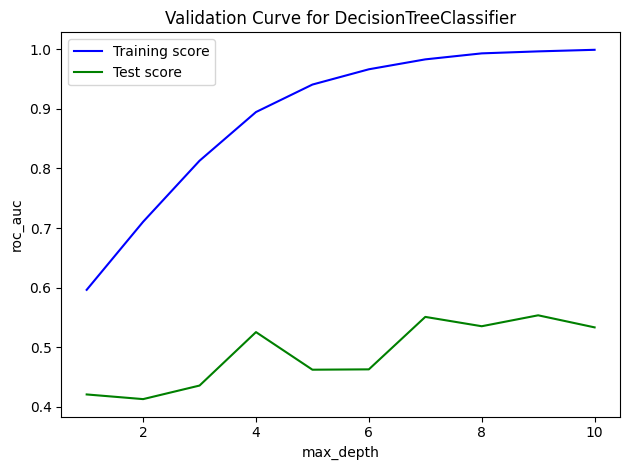

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Dinamik görselleştirme yapmak için validation_curve fonksiyonuna dayalı bir fonksiyon
def val_curve_params(model, x, y, param_name, param_range, scoring='roc_auc', cv=10):
    train_score, test_score = validation_curve(model, x, y,
                                               param_name=param_name,
                                               param_range=param_range,
                                               scoring=scoring,
                                               cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    plt.plot(param_range, mean_train_score, label='Training score', color='b')
    plt.plot(param_range, mean_test_score, label='Test score', color='g')
    plt.title(f'Validation Curve for {type(model).__name__}')
    plt.xlabel(f'{param_name}')
    plt.ylabel(f'{scoring}')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

# Model ve veri tanımlamaları
cart_final = DecisionTreeClassifier()  # DecisionTree modelini tanımlıyoruz
x = np.random.rand(100, 5)  # 100 satır ve 5 sütundan oluşan rastgele bir veri seti
y = np.random.randint(0, 2, size=100)  # 0 ve 1'den oluşan rastgele etiketler

# Dinamik görselleştirme fonksiyonunu çağırıyoruz
val_curve_params(cart_final, x, y, 'max_depth', range(1, 11))


In [9]:
cart_val_params = [["max_depth", range(1, 11)], ["min_samples_split", range(2, 20)]]

Görselleştirme ( Visualization )

In [13]:
def tree_graph(model, col_names, file_name):
    tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(file_name)

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Örnek veri seti
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Özellikler
y = pd.Series(data.target)  # Hedef değişken

# Model tanımlama ve eğitme
cart_final = DecisionTreeClassifier(max_depth=3)
cart_final.fit(X, y)

# tree_graph fonksiyonu
def tree_graph(model, col_names, file_name="tree"):
    dot_data = export_graphviz(model, out_file=None,
                               feature_names=col_names,
                               filled=True, rounded=True,
                               special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(file_name, format='png', cleanup=True)
    print(f"Decision tree görselleştirme '{file_name}.png' olarak kaydedildi.")

# Görselleştirme çağrısı
tree_graph(model=cart_final, col_names=X.columns, file_name="cart_final")


Decision tree görselleştirme 'cart_final.png' olarak kaydedildi.


In [20]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

Karar Kuralları

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Örnek veri seti (Iris veri seti kullanılıyor)
data = load_iris()
x = pd.DataFrame(data.data, columns=data.feature_names)  # Özellikler
y = pd.Series(data.target)  # Hedef değişken

# Eğitim ve test verilerini ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model tanımlama ve eğitme
cart_final = DecisionTreeClassifier(max_depth=4, random_state=42)  # Karar ağacı sınıflandırıcısı
cart_final.fit(x_train, y_train)

# Karar ağacı kurallarını yazdırma
tree_rules = export_text(cart_final, feature_names=list(x.columns))
print(tree_rules)


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



Karar Kurallarının Python Kodlarını Çıkartma

In [31]:
!pip install scikit-learn==0.23.1

  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [34]:
!pip install astor


In [35]:
print(skompile(cart_final.predict).to('python/code'))

(0 if x[2] <= 2.449999988079071 else (1 if x[3] <= 1.6500000357627869 else 
    2) if x[2] <= 4.75 else (1 if x[2] <= 4.950000047683716 else 2) if x[3] <=
    1.75 else 2 if x[2] <= 4.8500001430511475 else 2)



Python Kodları ile Tahmin İşlemleri

In [38]:
def predict_with_rules(x):
    return ((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6864999830722809 else
        0) if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else ((1 if x[5
        ] <= 32.45000076293945 else 1 if x[3] <= 10.5 else 0) if x[2] <= 53.0 else
        ((0 if x[1] <= 111.5 else 0 if x[2] <= 72.0 else 1 if x[3] <= 31.0 else
        0) if x[2] <= 82.5 else 1) if x[4] <= 36.5 else 0) if x[6] <=
        0.5005000084638596 else (0 if x[1] <= 88.5 else (((0 if x[0] <= 1.0 else
        1) if x[1] <= 98.5 else 1) if x[6] <= 0.9269999861717224 else 0) if x[1
        ] <= 116.0 else 0 if x[4] <= 166.0 else 1) if x[2] <= 69.0 else ((0 if
        x[2] <= 79.0 else 0 if x[1] <= 104.5 else 1) if x[3] <= 5.5 else 0) if
        x[6] <= 1.098000019788742 else 1) if x[5] <= 45.39999961853027 else 0 if
        x[7] <= 22.5 else 1) if x[7] <= 28.5 else (1 if x[5] <=
        9.649999618530273 else 0) if x[5] <= 26.350000381469727 else (1 if x[1] <=
        28.5 else ((0 if x[0] <= 11.5 else 1 if x[5] <= 31.25 else 0) if x[1] <=
        94.5 else (1 if x[5] <= 36.19999885559082 else 0) if x[1] <= 97.5 else
        0) if x[6] <= 0.7960000038146973 else 0 if x[0] <= 3.0 else (1 if x[6] <=
        0.9614999890327454 else 0) if x[3] <= 20.0 else 1) if x[1] <= 99.5 else
        ((1 if x[5] <= 27.649999618530273 else 0 if x[0] <= 5.5 else (((1 if x[
        0] <= 7.0 else 0) if x[1] <= 103.5 else 0) if x[1] <= 118.5 else 1) if
        x[0] <= 9.0 else 0) if x[6] <= 0.19999999552965164 else ((0 if x[5] <=
        36.14999961853027 else 1) if x[1] <= 113.0 else 1) if x[0] <= 1.5 else
        (1 if x[6] <= 0.3620000034570694 else 1 if x[5] <= 30.050000190734863 else
        0) if x[2] <= 67.0 else (((0 if x[6] <= 0.2524999976158142 else 1) if x
        [1] <= 120.0 else 1 if x[6] <= 0.23899999260902405 else 1 if x[7] <=
        30.5 else 0) if x[2] <= 83.0 else 0) if x[5] <= 34.45000076293945 else
        1 if x[1] <= 101.0 else 0 if x[5] <= 43.10000038146973 else 1) if x[6] <=
        0.5609999895095825 else ((0 if x[7] <= 34.5 else 1 if x[5] <=
        33.14999961853027 else 0) if x[4] <= 120.5 else (1 if x[3] <= 47.5 else
        0) if x[4] <= 225.0 else 0) if x[0] <= 6.5 else 1) if x[1] <= 127.5 else
        (((((1 if x[1] <= 129.5 else ((1 if x[6] <= 0.5444999933242798 else 0) if
        x[2] <= 56.0 else 0) if x[2] <= 71.0 else 1) if x[2] <= 73.0 else 0) if
        x[5] <= 28.149999618530273 else (1 if x[1] <= 135.0 else 0) if x[3] <=
        21.0 else 1) if x[4] <= 132.5 else 0) if x[1] <= 145.5 else 0 if x[7] <=
        25.5 else ((0 if x[1] <= 151.0 else 1) if x[5] <= 27.09999942779541 else
        ((1 if x[0] <= 6.5 else 0) if x[6] <= 0.3974999934434891 else 0) if x[2
        ] <= 82.0 else 0) if x[7] <= 61.0 else 0) if x[5] <= 29.949999809265137
         else ((1 if x[2] <= 61.0 else (((((0 if x[6] <= 0.18299999833106995 else
        1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else 0) if x[2] <=
        73.0 else 0) if x[0] <= 4.5 else 1 if x[6] <= 0.6169999837875366 else 0
        ) if x[6] <= 1.1414999961853027 else 1) if x[5] <= 41.79999923706055 else
        1 if x[6] <= 0.37299999594688416 else 1 if x[1] <= 142.5 else 0) if x[7
        ] <= 30.5 else (((1 if x[6] <= 0.13649999350309372 else 0 if x[5] <=
        32.45000076293945 else 1 if x[5] <= 33.05000114440918 else (0 if x[6] <=
        0.25599999725818634 else (0 if x[1] <= 130.5 else 1) if x[0] <= 8.5 else
        0) if x[0] <= 13.5 else 1) if x[2] <= 92.0 else 1) if x[5] <=
        45.54999923706055 else 1) if x[6] <= 0.4294999986886978 else (1 if x[5] <=
        40.05000114440918 else 0 if x[5] <= 40.89999961853027 else 1) if x[4] <=
        333.5 else 1 if x[2] <= 64.0 else 0) if x[1] <= 157.5 else ((((1 if x[7
        ] <= 25.5 else 0 if x[4] <= 87.5 else 1 if x[5] <= 45.60000038146973 else
        0) if x[7] <= 37.5 else 1 if x[7] <= 56.5 else 0 if x[6] <=
        0.22100000083446503 else 1) if x[6] <= 0.28849999606609344 else 0) if x
        [6] <= 0.3004999905824661 else 1 if x[7] <= 44.0 else (0 if x[7] <=
        51.0 else 1 if x[6] <= 1.1565000414848328 else 0) if x[0] <= 6.5 else 1
        ) if x[4] <= 629.5 else 1 if x[6] <= 0.4124999940395355 else 0)




In [39]:
X.columns

x = [12, 13, 20, 23, 4, 55, 12, 7]

predict_with_rules(x)

x = [6, 148, 70, 35, 0, 30, 0.62, 50]

predict_with_rules(x)

1

Model Kaydetme ve Çağırma

In [42]:
# Gerekli kütüphaneleri yükleyin
!pip install joblib
import joblib
import pandas as pd

# Modeli kaydet
joblib.dump(cart_final, "cart_final.pkl")

import joblib
import pandas as pd

# Daha önce kaydedilen modeli yükle
cart_model_from_disc = joblib.load("cart_final.pkl")

# Örnek veri (4 özellik sağlıyoruz)
x = [[12, 13, 20, 23]]  # Modelin beklentisine uygun şekilde düzenlendi

# Tahmin işlemi
prediction = cart_model_from_disc.predict(pd.DataFrame(x))
print(prediction)


[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
